
<a href="https://colab.research.google.com/github/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Sesiones/Sesion_01a_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

------------------------

<font size=7 color='#13DAE2'>
Sebastian Carrillo Mejía
</font>
<br>
<font size=7 color='#13DAE2'>
1001414595
</font>

------------------------

In [1]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression

import matplotlib.pylab as plt

In [2]:
#@title Load irirs dataset
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


- Realizar la clasifición de las tres clases  a traves de una regresión logística  y realizar multiclasicación, para ello considere lo siguiente:

Si en un dataset existen más de 2 clases, $y={0, 1, 2, 3, ...}$ se debe construir una multiclasificación, una contra todos, la estrategia sugerida es la siguiente.

Sea A, B, C las tres clases. Para estos valores definir:

1. Definir la clase A como la clase 0 y todas las otras B, C como la clase 1
2. Encontrar el valor $h_\theta(X) = P(y=A|x;\theta)$
3. Definir la clase B como la clase 0 y todas las otras A, C como la clase 1
4. Encontrar el valor $h_\theta(X) = P(y=B|x;\theta)$
5. Definir la clase C como la clase 0 y todas las otras A, B como la clase 1
6. Encontrar el valor $h_\theta(X) = P(y=C|x;\theta)$




In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
X = iris["data"]
Y = iris["target"]

In [6]:
names_features = iris["feature_names"]
names_target = iris["feature_names"]
df = pd.DataFrame(X, columns=names_features)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
columns_name =[ "".join([c.capitalize() for c in cols.split()])  for cols in df.columns ]
columns_name =[col.replace("(" ,"_") for col in columns_name ]
cols= [col.replace(")" ,"") for col in columns_name ]

In [8]:
df.columns=cols
df["Target"]=Y

In [9]:
df

,SepalLength_cm,SepalWidth_cm,PetalLength_cm,PetalWidth_cm,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [10]:
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["Target"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

In [11]:
df_train = strat_train_set
df_test = strat_test_set


In [12]:
df_test.head()

,SepalLength_cm,SepalWidth_cm,PetalLength_cm,PetalWidth_cm,Target
38,4.4,3.0,1.3,0.2,0
127,6.1,3.0,4.9,1.8,2
57,4.9,2.4,3.3,1.0,1
93,5.0,2.3,3.3,1.0,1
42,4.4,3.2,1.3,0.2,0


In [13]:
df_train.head()

,SepalLength_cm,SepalWidth_cm,PetalLength_cm,PetalWidth_cm,Target
8,4.4,2.9,1.4,0.2,0
106,4.9,2.5,4.5,1.7,2
76,6.8,2.8,4.8,1.4,1
9,4.9,3.1,1.5,0.1,0
89,5.5,2.5,4.0,1.3,1


#Clasificación tipo 1: setosa

In [14]:
#Seleccion de valores de y
# Tomemos solo una caractgeristicas por motivos didacticos
y_train = (df_train['Target'] == 0).astype(float) # forma rapida, se puede one hot enconder
X_train = df_train.iloc[:,0:1].values

y_test = (df_test['Target'] == 0).astype(float)
X_test = df_test.iloc[:,0:1].values

In [17]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [18]:
y_train

,Target
8,1.0
106,0.0
76,0.0
9,1.0
89,0.0
...,...
37,1.0
2,1.0
33,1.0
52,0.0


In [19]:
print(log_reg.score(X_train,y_train))
print(log_reg.score(X_test,y_test))

0.9166666666666666
0.8


In [20]:
# Determinacion de la frontera
X_new = np.linspace(-10, 10, 1000).reshape(-1, 1)#Generamos los valores de X_new
prob = log_reg.predict_proba(X_new)

In [21]:
prob

array([[0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       ...,
       [9.99999932e-01, 6.78835346e-08],
       [9.99999937e-01, 6.31876491e-08],
       [9.99999941e-01, 5.88166044e-08]])

In [22]:
decision_boundary = X_new[prob[:, 0] >= 0.5][0]
decision_boundary

array([5.35535536])

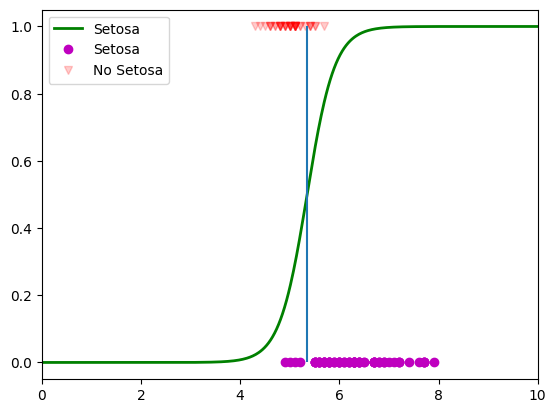

In [23]:
plt.figure()
#Regresion Logistica
plt.plot(X_new, prob[:, 0], "g-", linewidth=2, label="Setosa")
# Forntera de desicion
plt.plot(X_train[y_train==0], y_train[y_train==0],"mo",label = "Setosa")
plt.plot(X_train[y_train==1], y_train[y_train==1],"rv",alpha=0.2,label="No Setosa")
plt.xlim(0.0,10)
plt.legend()
plt.vlines(decision_boundary, 0,1)
plt.show()

# Tarea 8.1

¿Entrenar con más caracteristicas y con base a las probabilidades y dado un input  definir a  que clase pertenece: 'versicolor', 'virginica' ?

Por ejemplo dado X = [4.9,5.0, 1.8, 0.3] asociados a todas las caracteristicas, ¿cuál es la probabilidad de que la flor sea setosa, versicolor o virginica?




In [24]:
# Now we consider all possible characteristics

y_train = (df_train['Target']).astype(float)
X_train = df_train[['SepalLength_cm','SepalWidth_cm','PetalLength_cm','PetalWidth_cm']].values

y_test = (df_test['Target']).astype(float)
X_test = df_test[['SepalLength_cm','SepalWidth_cm','PetalLength_cm','PetalWidth_cm']].values


# Ceate the model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [25]:
print(log_reg.score(X_train,y_train))
print(log_reg.score(X_test,y_test))

0.975
0.9666666666666667


In [30]:
# Desired prediction
X = [4.9,5.0, 1.8, 0.3]
print(log_reg.predict_proba([X]))

[[9.92147316e-01 7.85262185e-03 6.17280999e-08]]


- En este caso, la visualización de la frontera no es posible por la cantidad de variables consideradas.

# SOFTMAX REGRESION

La elección anterior es conocida com softmax regresión, que permite definir un conjunto de probabilidades asociadas a un conjunto de clases. Al definir el maximo valor de la probabilidad dado un conjunto de inputs se tiene el objeto que predice el modelo, una forma de hacer una implementación rapida es mostrada a continuación.

In [27]:
# Para todas las clases se puede realizar facilmente a traves de
# lo siguiente

y_train = df_train['Target']
X_train = df_train.iloc[:,0:1].values

y_test = df_test['Target']
X_test = df_test.iloc[:,0:1].values

In [28]:
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", \
                                 C=10, random_state=42)
softmax_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=10, multi_class='multinomial', random_state=42)

In [31]:
X_new = np.linspace(0, 10, 1).reshape(-1, 1)
y_proba = softmax_reg.predict_proba(X_new)
print(y_proba)
#Probabilidad de pertencer a la clase cero

[[1.00000000e+00 8.05800456e-14 4.46297192e-19]]


# Tarea 8.2

1. Entrenar el modelo anterior para un numero mayor de caracteristicas
2. Analizar que pasa con la regularaización.
3. Hacer una analisis de las metricas, construir curvas de aprendizaje para todo el conjunto de datos
4. Con base en el libro [Hand on Machine learning](https://github.com/ageron/handson-ml/blob/master/04_training_linear_models.ipynb), constrnuir las fronteras de desición para este multiclasificador.

In [32]:
#@title Train the model with all characteristics


y_train = df_train['Target']
X_train = df_train[['SepalLength_cm','SepalWidth_cm','PetalLength_cm','PetalWidth_cm']].values

y_test = df_test['Target']
X_test = df_test[['SepalLength_cm','SepalWidth_cm','PetalLength_cm','PetalWidth_cm']].values

# Scale the variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model with scaled data
softmax_reg = LogisticRegression(solver="lbfgs", C=10, random_state=42, max_iter=200)
softmax_reg.fit(X_train_scaled, y_train)


LogisticRegression(C=10, max_iter=200, random_state=42)

In [35]:
#@title find the best hyperparam c with gridSearch


from sklearn.model_selection import GridSearchCV

# Define the range of values to take into account for c
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
softmax_reg = LogisticRegression(solver="lbfgs", random_state=42, max_iter=200)

# Apply the cross validation
grid_search = GridSearchCV(softmax_reg, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

print("Best C in 5 folds:", grid_search.best_params_)
print("Best exactitude in 5 folds:", grid_search.best_score_)

Best C in 5 folds: {'C': 10}
Best exactitude in 5 folds: 0.9666666666666668


Entre menor sea el valor de c, menos "flexible" es el modelo, es decir, más se penaliza con la regularización, cuando mayor es, la penalización es menor.

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

In [36]:
#@title Analize the metrics

# Define and train the model with the best parameter
softmax_reg = LogisticRegression(solver="lbfgs", C=10, random_state=42, max_iter=200)
softmax_reg.fit(X_train_scaled, y_train)

# Predictions for the test set
y_pred = softmax_reg.predict(X_test_scaled)

# Caculate performance metrics for the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print('------------------------')
print("Accuracy:", accuracy)
print('------------------------')
print("Precision:", precision)
print('------------------------')
print("Recall:", recall)
print('------------------------')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print('------------------------')

# Complete report
print("Classification Report:\n", classification_report(y_test, y_pred))


------------------------
Accuracy: 1.0
------------------------
Precision: 1.0
------------------------
Recall: 1.0
------------------------
Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
------------------------
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



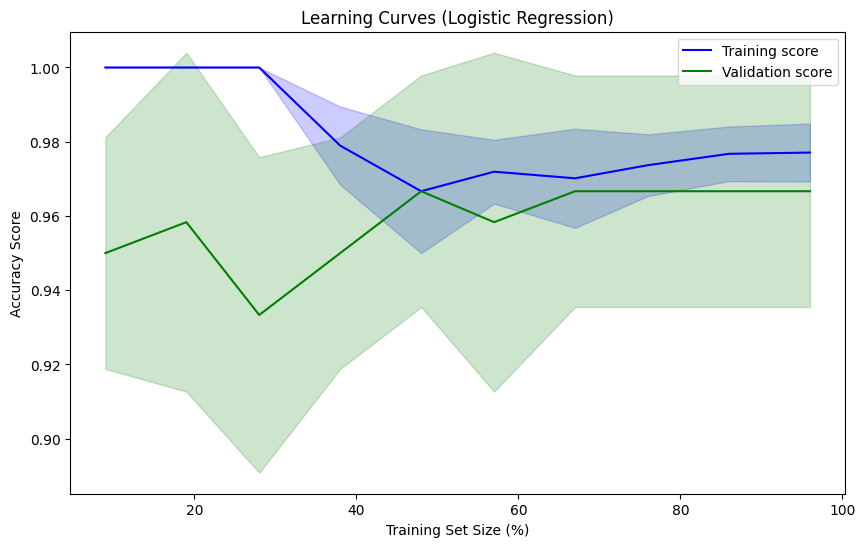

In [37]:
#@title learning curves

from sklearn.model_selection import learning_curve

# Configurar los tamaños de entrenamiento y calcular las curvas de aprendizaje
# Para evaluar el score se utilizan 5 folds en la validación cruzada
train_sizes, train_scores, test_scores = learning_curve(softmax_reg, X_train_scaled, y_train, cv=5, scoring='accuracy',train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)

# Calcular el promedio y la desviación estándar de los puntajes
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Graficar las curvas de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training score", color="blue")

# Se rellena el área sombreada en considerando la desviación estándar por arriba y por abajo, la desviación estándar se calcualr para
# los resultados de scores en los 5 folds por cada uno de los tamaños de datos de entrenamiento considerados
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.2, color="blue")

plt.plot(train_sizes, test_scores_mean, label="Validation score", color="green")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.2, color="green")


plt.xlabel("Training Set Size (%)")
plt.ylabel("Accuracy Score")
plt.title("Learning Curves (Logistic Regression)")
plt.legend(loc="best")
plt.show()


En general se visualiza un buen ajuste, puesto que ambas curvas de entrenamiento y validación tienen un valor alto en el accuracy, pero además ambas parecieran intentar converger a un valor cercano, si de pronto sucediera que la curva de valicación disminuyera alejándose de la de score, tendríamos overfitting.

Otro detalle importante esque los valores de la desviación estándas de la curva de validación son muy grandes comparados con los de entrenamieto.

In [38]:
from sklearn.model_selection import train_test_split

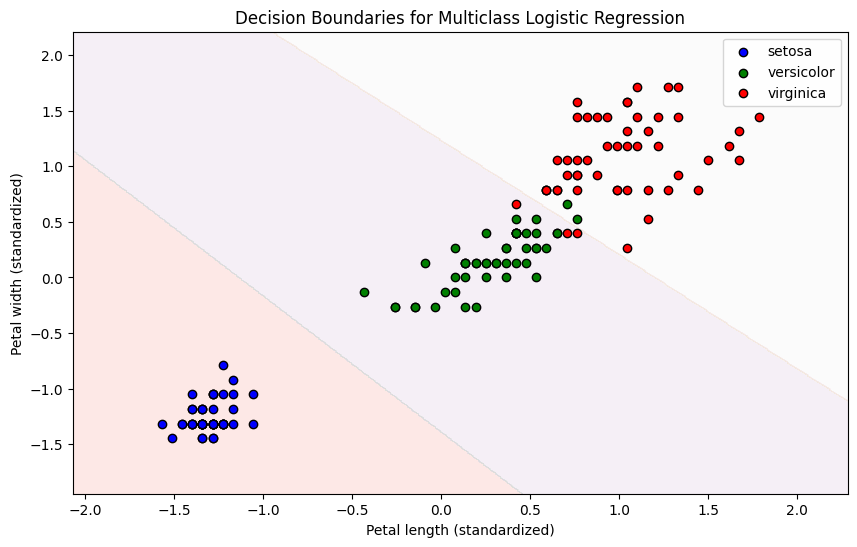

In [39]:
#@title Fronteras de decisión

# Cargar el conjunto de datos Iris
iris = datasets.load_iris()
X = iris.data[:, 2:4]  # Seleccionar longitud y ancho del pétalo para visualización, de agregar más características no podríamos visualizar
y = iris.target

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión logística
softmax_reg = LogisticRegression(solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X_train, y_train)

# Crear una malla de puntos para visualizar las fronteras de decisión
x0_min, x0_max = X_scaled[:, 0].min() - 0.5, X_scaled[:, 0].max() + 0.5
x1_min, x1_max = X_scaled[:, 1].min() - 0.5, X_scaled[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x0_min, x0_max, 500), np.linspace(x1_min, x1_max, 500))

# Predecir las probabilidades para cada punto en la malla
Z = softmax_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar las fronteras de decisión
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Pastel1')

# Graficar los puntos de entrenamiento
plt.scatter(X_scaled[y == 0, 0], X_scaled[y == 0, 1], color="blue", label=iris.target_names[0], edgecolor="k")
plt.scatter(X_scaled[y == 1, 0], X_scaled[y == 1, 1], color="green", label=iris.target_names[1], edgecolor="k")
plt.scatter(X_scaled[y == 2, 0], X_scaled[y == 2, 1], color="red", label=iris.target_names[2], edgecolor="k")

# gráfico
plt.xlabel("Petal length (standardized)")
plt.ylabel("Petal width (standardized)")
plt.legend()
plt.title("Decision Boundaries for Multiclass Logistic Regression")
plt.show()



Referencias

[1] http://cs229.stanford.edu/syllabus.html

[2] https://www.coursera.org/learn/machine-learning. Week 3.

[3] https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py


[4]https://scikit-learn.org/stable/datasets/toy_dataset.html